In [20]:
#Importing all the necessary packages
import time
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
data = pd.read_csv('weather_race_socioeconomic_all.csv')
print(data.info())
print("\nShape: ", data.shape)
print("\nYears: ", data.year.unique())
print("\nCounties: ", len(data.geoid10.unique()))
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8520 entries, 0 to 8519
Data columns (total 20 columns):
year                                                                    8520 non-null int64
geoid10                                                                 8520 non-null int64
ni_ir_                                                                  8520 non-null float64
popestimate                                                             8520 non-null float64
establish_                                                              8520 non-null int64
temperature                                                             8520 non-null float64
humidity                                                                8520 non-null float64
precipitation                                                           8520 non-null float64
Resident_population_White_alone                                         8520 non-null int64
Resident_population_Black_alone                        

,year,geoid10,ni_ir_,popestimate,establish_,temperature,humidity,precipitation,Resident_population_White_alone,Resident_population_Black_alone,Resident_population_American_Indian_and_Alaska_Native_alone,Resident_population_Asian_alone,Resident_population_Native_Hawaiian_and_Other_Pacific_Islander_alone,Resident_population_Two_or_more_races,Resident_population_Hispanic_or_Latino_Origin,Resident_population_Not_Hispanic_White_alone,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
0,2000,1001,0.0,44021.0,0,292.016556,68.767568,2.709550,35549,7558,198,204,13,350,610,35018,42463,4681,10.5,8489
1,2000,1003,0.0,141342.0,0,294.992369,73.640684,2.507449,124101,14678,823,547,38,1171,2486,121868,41283,13855,9.7,22176
2,2000,1015,0.0,111081.0,0,291.116250,66.668711,2.274747,88482,20770,451,656,79,904,1751,86919,32604,16561,15.1,19267
3,2000,1033,0.0,54997.0,0,290.819087,67.699906,2.730965,45045,9197,205,135,13,429,618,44515,33227,7128,13.1,8571
4,2000,1045,0.0,49124.0,0,293.179896,68.683388,2.566736,37170,10111,301,555,82,849,1644,35808,32824,7261,15.3,7599


In [22]:
final = pd.DataFrame()
unique_geoids = list(data.geoid10.unique())

for g in range(0,len(unique_geoids)):     #For each county        
    
    geoid = unique_geoids[g]
    temp = data[data["geoid10"] == geoid]   #County dataframe            
    non_est = (temp['establish_'] == 0).sum() #Initializing non established year count
    true_non_est = non_est - 1
    temp = temp[true_non_est:]
    final = final.append(temp, ignore_index=True)

In [23]:
print("Shape: ", final.shape)
print("\nExample County: Champaign (Data includes the year of establishment)\n")
final[final["geoid10"] == 17019]

Shape:  (4324, 20)

Example County: Champaign (Data includes the year of establishment)



,year,geoid10,ni_ir_,popestimate,establish_,temperature,humidity,precipitation,Resident_population_White_alone,Resident_population_Black_alone,Resident_population_American_Indian_and_Alaska_Native_alone,Resident_population_Asian_alone,Resident_population_Native_Hawaiian_and_Other_Pacific_Islander_alone,Resident_population_Two_or_more_races,Resident_population_Hispanic_or_Latino_Origin,Resident_population_Not_Hispanic_White_alone,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
1013,2002,17019,1.085788,184198.0,0,285.751294,76.811407,2.950327,145758,20783,528,12999,94,2940,6038,140401,39337,22055,12.8,23995
1014,2003,17019,0.534722,187013.0,1,285.042409,75.447187,2.780357,146977,21061,539,13519,95,3089,6391,141289,39227,21419,12.6,23915
1015,2004,17019,0.000000,188617.0,1,285.523229,76.462760,2.892529,147321,21317,554,13827,96,3246,6688,141371,39914,22790,13.4,24031
1016,2005,17019,0.000000,190659.0,1,286.587957,73.461870,2.516197,148044,21619,566,14206,97,3338,7042,141764,40225,29800,17.7,24018
1017,2006,17019,0.000000,193844.0,1,286.714172,73.105661,2.734647,149712,22140,579,14622,98,3448,7407,143095,43271,32582,19.2,24023
1018,2007,17019,0.000000,196621.0,1,286.414375,72.484783,2.527791,151043,22746,586,14902,100,3598,7876,143992,44237,31753,18.2,23882
1019,2008,17019,0.000000,197570.0,1,284.820813,76.484798,3.490541,151442,22924,597,14819,102,3678,8163,144134,45840,32595,18.7,23592
1020,2009,17019,0.000000,199968.0,1,285.101415,76.690299,3.264945,152686,23450,611,15040,103,3781,8438,145137,42101,34982,19.9,23479


In [24]:
#Checking for missing data/null values
final.isnull().any()

year                                                                    False
geoid10                                                                 False
ni_ir_                                                                  False
popestimate                                                             False
establish_                                                              False
temperature                                                             False
humidity                                                                False
precipitation                                                           False
Resident_population_White_alone                                         False
Resident_population_Black_alone                                         False
Resident_population_American_Indian_and_Alaska_Native_alone             False
Resident_population_Asian_alone                                         False
Resident_population_Native_Hawaiian_and_Other_Pacific_Islander_a

In [6]:
# Labels are the values we want to predict
labels = np.array(final['ni_ir_'])

In [7]:
# Remove the labels from the features
# axis 1 refers to the columns
features = final.drop('ni_ir_', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
print("Feature list:\n\n", feature_list)

Feature list:

 ['year', 'geoid10', 'popestimate', 'establish_', 'temperature', 'humidity', 'precipitation', 'Resident_population_White_alone', 'Resident_population_Black_alone', 'Resident_population_American_Indian_and_Alaska_Native_alone', 'Resident_population_Asian_alone', 'Resident_population_Native_Hawaiian_and_Other_Pacific_Islander_alone', 'Resident_population_Two_or_more_races', 'Resident_population_Hispanic_or_Latino_Origin', 'Resident_population_Not_Hispanic_White_alone', 'Median_Household_Income', 'Poverty_number_of_people', 'Poverty_percent_of_people', 'Public_school_enrollment_Fall']


In [8]:
# Convert dataframe to numpy array
features = np.array(features)
print("The shape of features is:\t", features.shape)

The shape of features is:	 (4324, 19)


In [9]:
#Setting the random state to 42 which means the results will be the same each time we run the split 
#for reproducible results

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3243, 19)
Training Labels Shape: (3243,)
Testing Features Shape: (1081, 19)
Testing Labels Shape: (1081,)


In [11]:
#Instantiating model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [12]:
start = time.process_time() #To calculate the time taken to train the model

# Train the model on training data
rf.fit(train_features, train_labels)

print("Model trained in ", time.process_time() - start, "seconds")

Model trained in  66.106602 seconds


In [13]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [14]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'IR units')

Mean Absolute Error: 0.69 IR units


In [15]:
print('R2 value: ', r2_score(test_labels, predictions))

R2 value:  0.32895511342426764


In [16]:
print ('Mean Squared Error: ', mean_squared_error(test_labels, predictions))

Mean Squared Error:  2.4505016035496667


In [17]:
importances = list(rf.feature_importances_)

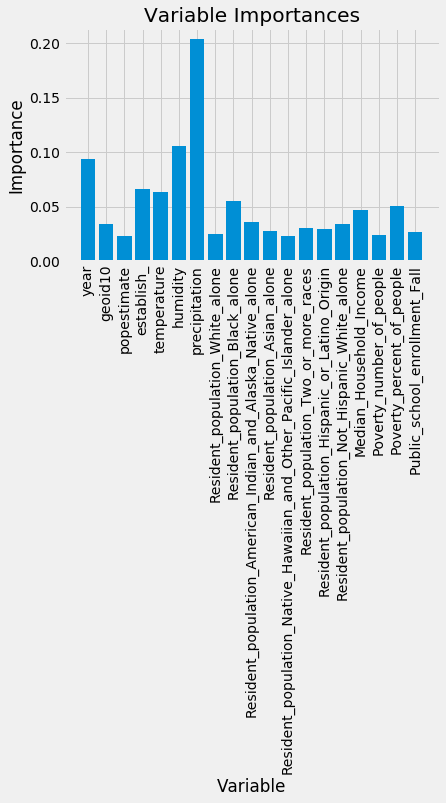

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [19]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = feature_list,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
precipitation,0.203707
humidity,0.105282
year,0.093415
establish_,0.065840
temperature,0.063082
Resident_population_Black_alone,0.055032
Poverty_percent_of_people,0.050804
Median_Household_Income,0.047090
Resident_population_American_Indian_and_Alaska_Native_alone,0.036025
geoid10,0.034433
